In [2]:
df_gis = pd.read_csv('mergeddata.csv')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import psycopg2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_gis.head()

,Unnamed: 0,ID,REGISTRATIONON,DOB_x,ETHNICITY_x,NHI,QUINTILE_x,pat_id,address_id,fid,...,BP SYSTOLIC VERY HIGH,HIGH RISK ETHNICITY,BMI VERY HIGH,HOUSE OF MORE THAN 2 SMOKERS,RESPIRATORY,LIVING IN DEPRIVATION INDEX 9-10,IS A SMOKER,DIABETES,Hospital-Free Days,Hospital-Free
0,0,1,2009-02-09,1990-02-09,21.0,ETL0663,4,1000,524276,17714,...,0,1,0,0,1,1,0,0,364,1
1,1,4583,2006-05-22,1975-06-25,21.0,GCX7519,4,32301,524276,17714,...,0,1,0,0,0,0,0,0,364,1
2,2,5025,2016-02-24,2009-10-13,21.0,TMH7602,4,34746,524276,17714,...,0,1,0,0,0,0,0,0,364,1
3,3,8816,2017-10-24,2004-03-23,21.0,RTT0947,4,992,524276,17714,...,0,1,0,0,0,1,0,0,365,0
4,4,8818,2009-02-09,1972-02-07,11.0,DUK4265,4,994,524276,17714,...,0,0,0,0,0,1,0,0,365,0


In [4]:
giscols = ['pat_id','address_id', 'harvested_dist', 'urban_park_dist', 'exotic_frst_dist',
           'exotic_grass_dist', 'exotic_shrub_dist', 'crop_dist',
            'indg_frst_dist', 'broadleaf_dist', 'tree_count', 'solar_watts_mean',
            'wetness_index_mean'
          ]

In [5]:
gisdf = df_gis[giscols]

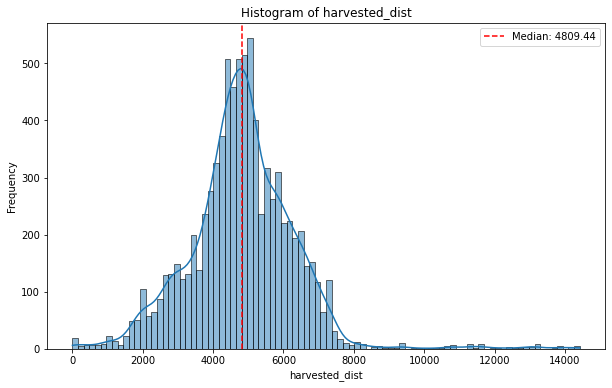

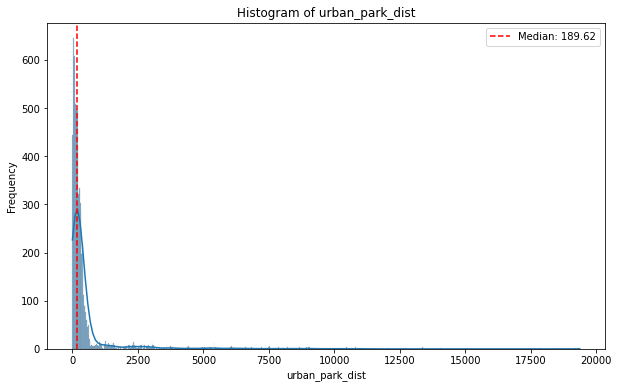

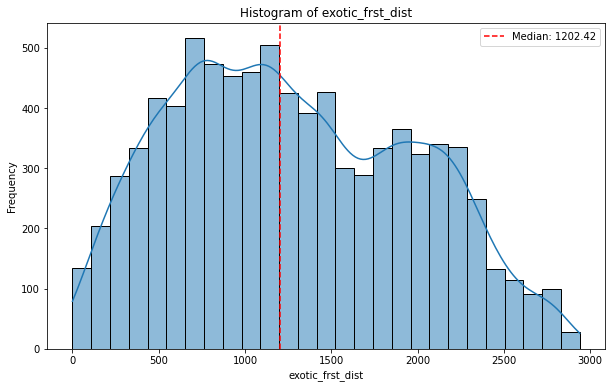

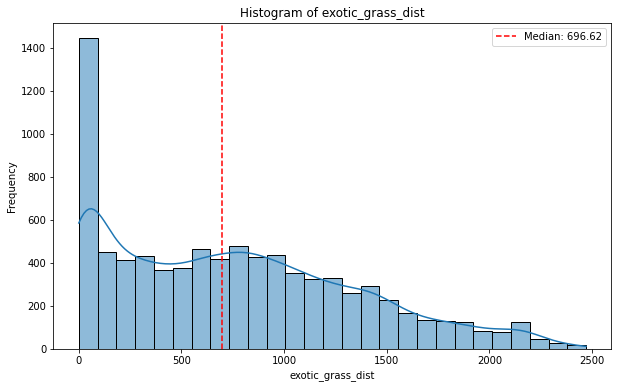

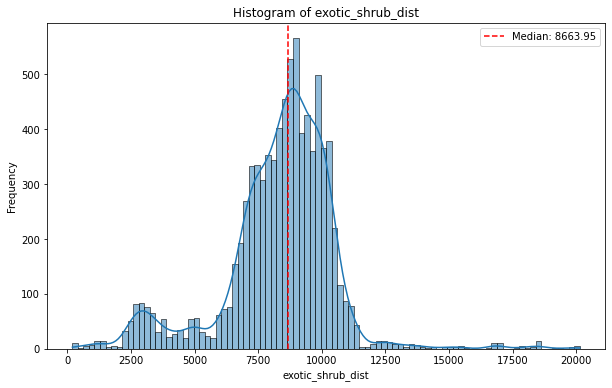

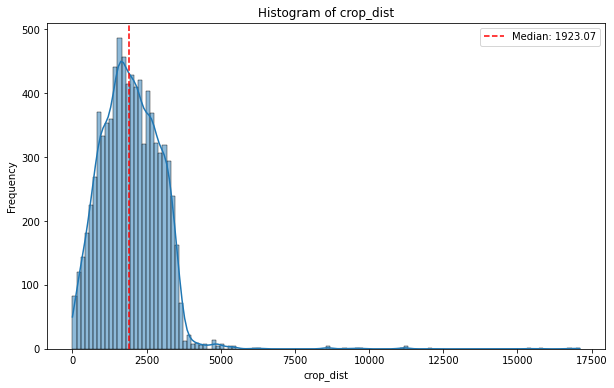

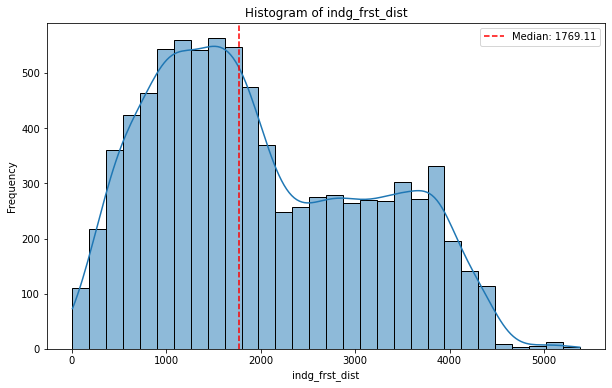

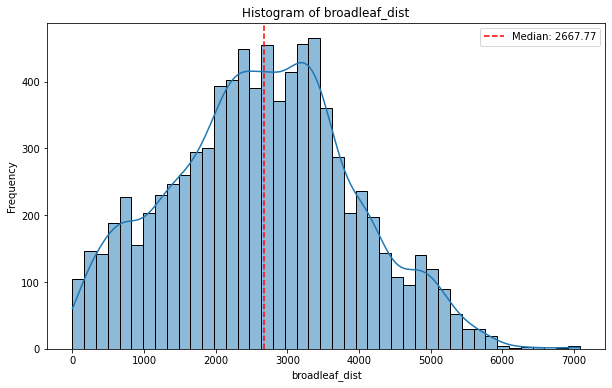

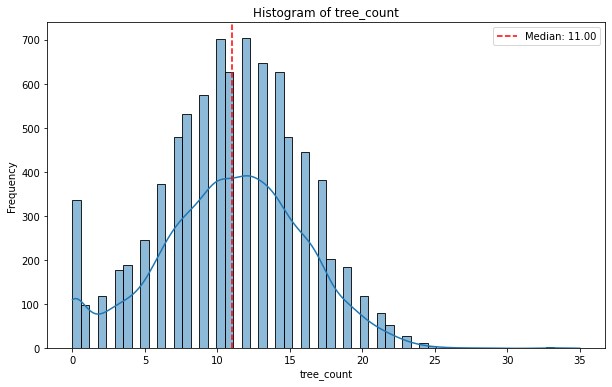

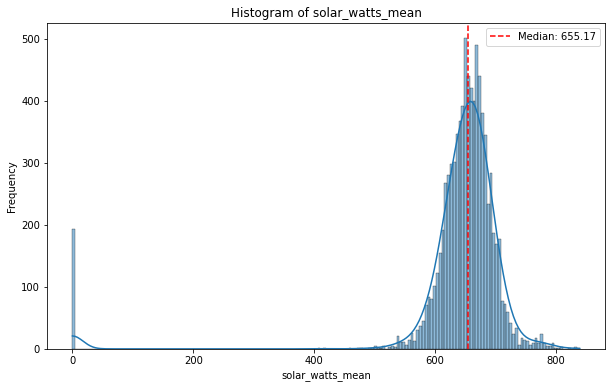

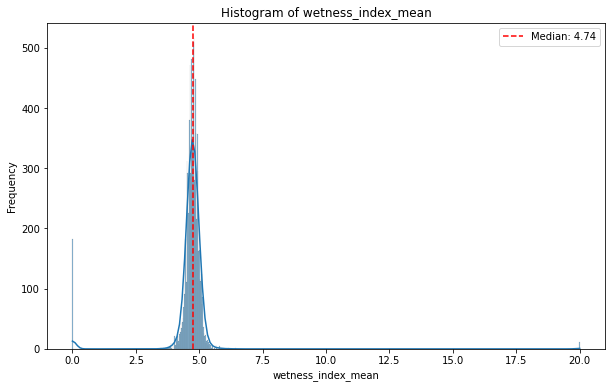

In [44]:
dict_med = {}
# Loop through each GIS column
for col in giscols[2:]:
    # Create a figure
    plt.figure(figsize=(10, 6))

    # Plot the histogram with KDE
    sns.histplot(data=gisdf , x=col, kde=True)

    # Calculate the median value
    median = gisdf [col].median()
    dict_med[col] = median 

    # Add a vertical line for the median
    plt.axvline(x=median, color='red', linestyle='--', label='Median: {:.2f}'.format(median))

    # Add title and labels
    plt.title('Histogram of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

In [48]:
'''
Qn_PMS = pd.read_csv('Qn_pms.csv')
Qn_PMS.drop(columns=['Unnamed: 0'],inplace=True)
Qn_PMS.head()
GIS_temp = df_gis[giscols] 
GIS_temp.columns = ['patient_id','address_id', 'harvested_dist', 'urban_park_dist', 'exotic_frst_dist',
           'exotic_grass_dist', 'exotic_shrub_dist', 'crop_dist',
            'indg_frst_dist', 'broadleaf_dist', 'tree_count', 'solar_watts_mean',
            'wetness_index_mean'
          ]
Qn_PMS.shape,GIS_temp.shape
Gis_data = pd.merge(GIS_temp,Qn_PMS, on='patient_id', how='inner')
print(Gis_data.shape) #5718
'''
dict_med

{'harvested_dist': 4809.436373,
 'urban_park_dist': 189.619851,
 'exotic_frst_dist': 1202.41965,
 'exotic_grass_dist': 696.6175910000001,
 'exotic_shrub_dist': 8663.947412000001,
 'crop_dist': 1923.069025,
 'indg_frst_dist': 1769.107986,
 'broadleaf_dist': 2667.7655210000003,
 'tree_count': 11.0,
 'solar_watts_mean': 655.17,
 'wetness_index_mean': 4.74}

In [8]:
X_gis = df_gis[giscols]
y = df_gis['Hospital-Free']
print(X_gis.shape, y.shape)

(8431, 13) (8431,)


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_gis.iloc[:,2:],
                                                    y,
                                                    test_size=0.96,
                                                    random_state=42,
                                                    stratify=y)


print(X_train.shape, X_test.shape)
print(y_test.value_counts())
print(y_train.value_counts())

# Apply the SMOTE algorithm to balance the classes in the training data.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#model = LinearRegression()
model = RandomForestClassifier(random_state=42, class_weight= 'balanced',
                               max_depth=10,min_samples_leaf= 2,min_samples_split= 5,n_estimators= 200)#tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


(337, 11) (8094, 11)
0    6209
1    1885
Name: Hospital-Free, dtype: int64
0    258
1     79
Name: Hospital-Free, dtype: int64


Accuracy: 0.7348653323449469


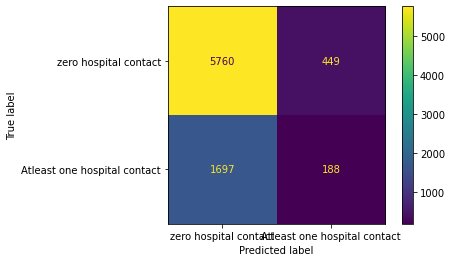

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['zero hospital contact', 'Atleast one hospital contact'])
disp.plot()
plt.show()


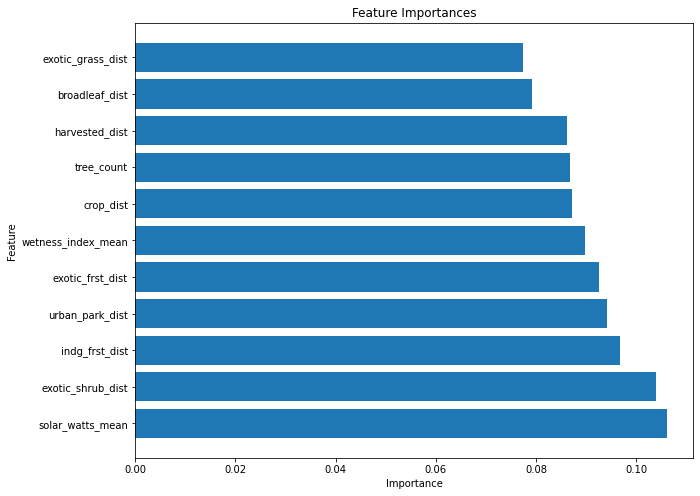

In [11]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_gis.iloc[:,2:].columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [12]:
# Extract the probabilities of being hospitalized (class '1')
hospitalization_probabilities = model.predict_proba(X_gis.iloc[:,2:])[:, 1]

In [13]:
Qn_gfinal = pd.DataFrame({'patient_id': X_gis['pat_id'],
                         'address_id':X_gis['address_id'],
                         'Qn_GIS': 10*hospitalization_probabilities,
                         'Hospitalized': y})

In [14]:
#Qn_gfinal.to_csv('Qn_GIS.csv')
Qn_gfinal.head()

,patient_id,address_id,Qn_GIS,Hospitalized
0,1000,524276,3.024046,1
1,32301,524276,3.024046,1
2,34746,524276,3.024046,1
3,992,524276,3.024046,0
4,994,524276,3.024046,0


0.12.2


/Users/amardeepsingh/PycharmProjects/CourseNL/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we load stuff.


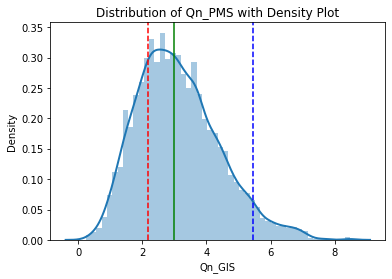

In [15]:
print(sns.__version__)


# Calculate percentiles
percentile_25 = np.percentile(Qn_gfinal['Qn_GIS'], 25)
percentile_50 = np.percentile(Qn_gfinal['Qn_GIS'], 50)  # This is the median
percentile_95 = np.percentile(Qn_gfinal['Qn_GIS'], 95)

# Plotting
sns.distplot(Qn_gfinal['Qn_GIS'], kde=True, hist=True, kde_kws={'linewidth': 2})

# Add vertical lines for each percentile
plt.axvline(percentile_25, color='r', linestyle='--', label='25th percentile')
plt.axvline(percentile_50, color='g', linestyle='-', label='Median (50th percentile)')
plt.axvline(percentile_95, color='b', linestyle='--', label='95th percentile')
# Beautify the plot
plt.title('Distribution of Qn_PMS with Density Plot')
plt.xlabel('Qn_GIS')
plt.ylabel('Density')

# Show the plot
plt.show()

0.12.2


/Users/amardeepsingh/PycharmProjects/CourseNL/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we load stuff.


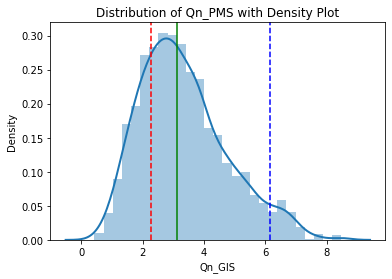

In [16]:
print(sns.__version__)


# Calculate percentiles
percentile_25 = np.percentile(Qn_gfinal['Qn_GIS'][Qn_gfinal['Hospitalized']==1], 25)
percentile_50 = np.percentile(Qn_gfinal['Qn_GIS'][Qn_gfinal['Hospitalized']==1], 50)  # This is the median
percentile_95 = np.percentile(Qn_gfinal['Qn_GIS'][Qn_gfinal['Hospitalized']==1], 95)

# Plotting
sns.distplot(Qn_gfinal['Qn_GIS'][Qn_gfinal['Hospitalized']==1], kde=True, hist=True, kde_kws={'linewidth': 2})

# Add vertical lines for each percentile
plt.axvline(percentile_25, color='r', linestyle='--', label='25th percentile')
plt.axvline(percentile_50, color='g', linestyle='-', label='Median (50th percentile)')
plt.axvline(percentile_95, color='b', linestyle='--', label='95th percentile')
# Beautify the plot
plt.title('Distribution of Qn_PMS with Density Plot')
plt.xlabel('Qn_GIS')
plt.ylabel('Density')

# Show the plot
plt.show()

In [17]:
print(Qn_gfinal['Qn_GIS'].idxmin(),Qn_gfinal['Qn_GIS'].idxmax())
Qn_gfinal.head(10)

4983 1457


,patient_id,address_id,Qn_GIS,Hospitalized
0,1000,524276,3.024046,1
1,32301,524276,3.024046,1
2,34746,524276,3.024046,1
3,992,524276,3.024046,0
4,994,524276,3.024046,0
5,996,524276,3.024046,1
6,43818,524276,3.024046,1
7,44011,524276,3.024046,0
8,14051,550168,2.443076,1
9,5773,550168,2.443076,1


In [18]:
Qn_PMS = pd.read_csv('Qn_pms.csv')
Qn_PMS.drop(columns=['Unnamed: 0'],inplace=True)
Qn_PMS.head()

,patient_id,Qn_PMS,Hospitalized
0,24,3.827316,0
1,27,3.905246,0
2,28,5.276403,1
3,33,4.211982,0
4,36,3.959994,0


In [19]:
print(Qn_PMS.shape, Qn_gfinal.shape)

(9428, 3) (8431, 4)


In [20]:
# Merge based on the 'patient_id' column
Qn = pd.merge(Qn_PMS, Qn_gfinal, on='patient_id', how='inner')
print(Qn.shape)

(5718, 6)


In [21]:
Qn.head()

,patient_id,Qn_PMS,Hospitalized_x,address_id,Qn_GIS,Hospitalized_y
0,24,3.827316,0,518173,2.686759,0
1,27,3.905246,0,529681,2.492715,1
2,28,5.276403,1,541852,3.293870,1
3,33,4.211982,0,545022,3.466888,0
4,36,3.959994,0,1528665,3.217357,0


In [22]:
pats_df =  pd.read_csv('data_ML.csv')
pats_df.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
pats_df.iloc[:,:-1].head()

,patient_id,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,Haemoglobin_encoded,eGFR_encoded,Triglyceride_encoded,Chol/HDL Ratio_encoded,mmol_encoded,Ferritin_encoded,LDL Cholesterol_encoded,Uric Acid_encoded,Albumin/Creatinine Ratio_encoded,BMI_encoded,cms_encoded
0,24,F,51-60,Normal,High Stage 1,Normal,Normal,Normal,Normal,Normal,Normal,Moderate to High risk,Low risk,Low risk,BMI not good,2
1,27,F,31-40,Normal,Normal,Normal,Normal,Borderline High,Borderline High,Normal,Normal,Low risk,Low risk,Moderate to High risk,BMI not good,2
2,28,F,61-70,High Stage 2,High Stage 2,Normal,Normal,Borderline High,Borderline High,Normal,Normal,Moderate to High risk,Moderate Risk,Low risk,BMI very Bad,0
3,33,M,41-50,Elevated,Normal,Normal,Normal,Borderline High,High,Normal,Normal,Moderate to High risk,Low risk,Low risk,BMI very Bad,2
4,36,M,71-80,Normal,Normal,Normal,Normal,Borderline High,Borderline High,Normal,Normal,High Risk,Low risk,Low risk,BMI not good,0


In [24]:
pats_info = pd.merge(Qn, pats_df.iloc[:,:-1], on='patient_id', how='inner')
print(pats_info.shape)

(5718, 21)


In [25]:
pats_info['Hospitalized_x'].sum(),pats_info['Hospitalized_y'].sum()

(1428, 1372)

In [26]:
# Combining 'Hospitalized_x' and 'Hospitalized_y' into one column with value 1 if either is 1
pats_info['Hospitalized_combined'] = ((pats_info['Hospitalized_x'] == 1) | (pats_info['Hospitalized_y'] == 1)).astype(int)

pats_info.head()

,patient_id,Qn_PMS,Hospitalized_x,address_id,Qn_GIS,Hospitalized_y,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,Triglyceride_encoded,Chol/HDL Ratio_encoded,mmol_encoded,Ferritin_encoded,LDL Cholesterol_encoded,Uric Acid_encoded,Albumin/Creatinine Ratio_encoded,BMI_encoded,cms_encoded,Hospitalized_combined
0,24,3.827316,0,518173,2.686759,0,F,51-60,Normal,High Stage 1,...,Normal,Normal,Normal,Normal,Moderate to High risk,Low risk,Low risk,BMI not good,2,0
1,27,3.905246,0,529681,2.492715,1,F,31-40,Normal,Normal,...,Borderline High,Borderline High,Normal,Normal,Low risk,Low risk,Moderate to High risk,BMI not good,2,1
2,28,5.276403,1,541852,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,Borderline High,Borderline High,Normal,Normal,Moderate to High risk,Moderate Risk,Low risk,BMI very Bad,0,1
3,33,4.211982,0,545022,3.466888,0,M,41-50,Elevated,Normal,...,Borderline High,High,Normal,Normal,Moderate to High risk,Low risk,Low risk,BMI very Bad,2,0
4,36,3.959994,0,1528665,3.217357,0,M,71-80,Normal,Normal,...,Borderline High,Borderline High,Normal,Normal,High Risk,Low risk,Low risk,BMI not good,0,0


In [27]:
X, yq = pats_info[['Qn_PMS','Qn_GIS']], pats_info['Hospitalized_y']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    yq,
                                                    test_size=0.96,
                                                    random_state=42,
                                                    stratify=yq)


print(X_train.shape, X_test.shape)
print(y_test.value_counts())
print(y_train.value_counts())

# Apply the SMOTE algorithm to balance the classes in the training data.
smote = SMOTE(random_state=42)
#model = LinearRegression()
modelQ = RandomForestClassifier(random_state=42, class_weight= 'balanced',
                               max_depth=10,min_samples_leaf= 2,min_samples_split= 5,n_estimators= 200)#tree.DecisionTreeClassifier()
modelQ.fit(X_train, y_train)
y_pred = modelQ.predict(X_test)

(228, 2) (5490, 2)
0    4173
1    1317
Name: Hospitalized_y, dtype: int64
0    173
1     55
Name: Hospitalized_y, dtype: int64


Accuracy: 0.6901639344262295


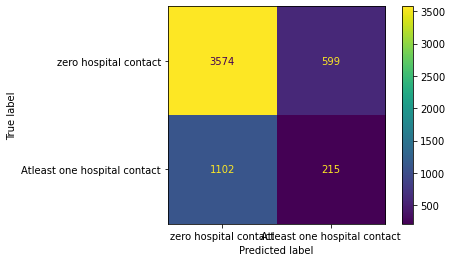

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['zero hospital contact', 'Atleast one hospital contact'])
disp.plot()
plt.show()

In [30]:
# Extract the probabilities of being hospitalized (class '1')
hospitalization_probabilities = modelQ.predict_proba(X)[:, 1]

In [31]:
Qn = pd.DataFrame({'patient_id': pats_info['patient_id'],
                   'address_id':pats_info['address_id'],
                   'Qn': 10*hospitalization_probabilities,
                   'Qn_PMS': pats_info['Qn_PMS'],
                   'Q_GIS': pats_info['Qn_GIS'],
                   'Hospitalized': pats_info['Hospitalized_y']})

In [32]:
Qn.head()

,patient_id,address_id,Qn,Qn_PMS,Q_GIS,Hospitalized
0,24,518173,3.206411,3.827316,2.686759,0
1,27,529681,1.683976,3.905246,2.492715,1
2,28,541852,4.342929,5.276403,3.293870,1
3,33,545022,4.617875,4.211982,3.466888,0
4,36,1528665,3.045342,3.959994,3.217357,0


In [33]:
pats_Qn = pd.merge(Qn, pats_df.iloc[:,:-1], on='patient_id', how='inner')
print(pats_info.shape)

(5718, 22)


In [34]:
pats_Qn.head()

,patient_id,address_id,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,eGFR_encoded,Triglyceride_encoded,Chol/HDL Ratio_encoded,mmol_encoded,Ferritin_encoded,LDL Cholesterol_encoded,Uric Acid_encoded,Albumin/Creatinine Ratio_encoded,BMI_encoded,cms_encoded
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,Normal,Normal,Normal,Normal,Normal,Moderate to High risk,Low risk,Low risk,BMI not good,2
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,Normal,Borderline High,Borderline High,Normal,Normal,Low risk,Low risk,Moderate to High risk,BMI not good,2
2,28,541852,4.342929,5.276403,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,Normal,Borderline High,Borderline High,Normal,Normal,Moderate to High risk,Moderate Risk,Low risk,BMI very Bad,0
3,33,545022,4.617875,4.211982,3.466888,0,M,41-50,Elevated,Normal,...,Normal,Borderline High,High,Normal,Normal,Moderate to High risk,Low risk,Low risk,BMI very Bad,2
4,36,1528665,3.045342,3.959994,3.217357,0,M,71-80,Normal,Normal,...,Normal,Borderline High,Borderline High,Normal,Normal,High Risk,Low risk,Low risk,BMI not good,0


In [35]:
GIS_temp = df_gis[giscols] 
GIS_temp.columns = ['patient_id','address_id', 'harvested_dist', 'urban_park_dist', 'exotic_frst_dist',
           'exotic_grass_dist', 'exotic_shrub_dist', 'crop_dist',
            'indg_frst_dist', 'broadleaf_dist', 'tree_count', 'solar_watts_mean',
            'wetness_index_mean'
          ]
Final_Qn = pd.merge(pats_Qn, GIS_temp, on='patient_id', how='inner')
print(Final_Qn.shape)

(5718, 33)


In [36]:
Final_Qn.head()

,patient_id,address_id_x,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,urban_park_dist,exotic_frst_dist,exotic_grass_dist,exotic_shrub_dist,crop_dist,indg_frst_dist,broadleaf_dist,tree_count,solar_watts_mean,wetness_index_mean
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,2266.447984,760.981013,79.974606,8776.532280,670.496396,2213.163993,2629.865486,12,647.18,4.79
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,130.183920,274.165804,631.562102,6834.174231,2204.279552,283.364573,515.095408,18,642.62,4.98
2,28,541852,4.342929,5.276403,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,253.910914,2659.228458,1874.392814,8838.204817,2966.731039,2712.843974,3937.842119,9,659.53,4.94
3,33,545022,4.617875,4.211982,3.466888,0,M,41-50,Elevated,Normal,...,248.642050,1974.065195,1051.597989,9303.835407,1034.894057,3900.877081,3301.335916,10,676.15,4.78
4,36,1528665,3.045342,3.959994,3.217357,0,M,71-80,Normal,Normal,...,428.020100,516.776990,189.392529,9886.706238,699.742876,2926.999462,1725.328031,2,689.10,4.41


In [ ]:
#Final_Qn.to_csv('QnVersion2.csv')

In [37]:
Final_Qn.head(2)

,patient_id,address_id_x,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,urban_park_dist,exotic_frst_dist,exotic_grass_dist,exotic_shrub_dist,crop_dist,indg_frst_dist,broadleaf_dist,tree_count,solar_watts_mean,wetness_index_mean
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,2266.447984,760.981013,79.974606,8776.532280,670.496396,2213.163993,2629.865486,12,647.18,4.79
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,130.183920,274.165804,631.562102,6834.174231,2204.279552,283.364573,515.095408,18,642.62,4.98


In [38]:
import shap
shap.initjs()

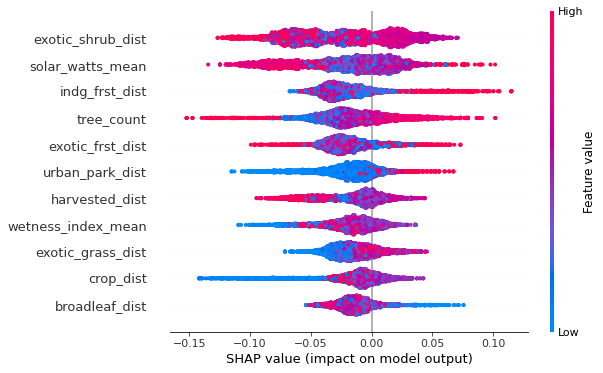

In [39]:
# Create object that can calculate shap values (decision tree/ xgboost)
explainer1 = shap.TreeExplainer(model)

# Random forest learning classifer
shap_values1 = explainer1.shap_values(X_gis.iloc[:,2:])
shap.summary_plot(shap_values1[1],X_gis.iloc[:,2:])

In [42]:
# make force plot for model

shap.force_plot(explainer1.expected_value[1], shap_values1[1][0,:], X_gis.iloc[0,2:])

In [52]:
# Convert the SHAP values for class 1 to a DataFrame
shap_values_final  = pd.DataFrame(shap_values1[1], columns=['imp_' + col for col in X_gis.iloc[:,2:].columns])

# The expected value for class 1 is a single number, applicable to all instances
expected_value_class1 = explainer1.expected_value[1]

# You might want to attach the original feature values as well for reference
# In this case, make sure X_pms and shap_values_df are aligned by index
df_final_featureimportance = pd.concat([X_gis, shap_values_final], axis=1)

# Now combined_df contains both the original feature values and their corresponding SHAP values
# for each instance in the DataFrame for class 1

# To display or use this combined DataFrame:
df_final_featureimportance.head()

,pat_id,address_id,harvested_dist,urban_park_dist,exotic_frst_dist,exotic_grass_dist,exotic_shrub_dist,crop_dist,indg_frst_dist,broadleaf_dist,...,imp_urban_park_dist,imp_exotic_frst_dist,imp_exotic_grass_dist,imp_exotic_shrub_dist,imp_crop_dist,imp_indg_frst_dist,imp_broadleaf_dist,imp_tree_count,imp_solar_watts_mean,imp_wetness_index_mean
0,1000,524276,5754.330086,121.300629,967.81952,458.74306,9395.030474,1862.443086,808.942213,3383.080202,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
1,32301,524276,5754.330086,121.300629,967.81952,458.74306,9395.030474,1862.443086,808.942213,3383.080202,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
2,34746,524276,5754.330086,121.300629,967.81952,458.74306,9395.030474,1862.443086,808.942213,3383.080202,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
3,992,524276,5754.330086,121.300629,967.81952,458.74306,9395.030474,1862.443086,808.942213,3383.080202,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
4,994,524276,5754.330086,121.300629,967.81952,458.74306,9395.030474,1862.443086,808.942213,3383.080202,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697


In [53]:
df_final_featureimportance.shape

(8431, 24)

In [47]:
df_final_featureimportance.to_csv('temp.csv')

In [54]:
# Update the DataFrame based on the median
for column in dict_med.keys():
    if column in df_final_featureimportance.columns:
        median_value = df_final_featureimportance[column].median()
        df_final_featureimportance[column] = df_final_featureimportance[column].apply(lambda x: 'Above median' if x > median_value else ('Below median' if x < median_value else 'Equal to median'))

df_final_featureimportance.head()

,pat_id,address_id,harvested_dist,urban_park_dist,exotic_frst_dist,exotic_grass_dist,exotic_shrub_dist,crop_dist,indg_frst_dist,broadleaf_dist,...,imp_urban_park_dist,imp_exotic_frst_dist,imp_exotic_grass_dist,imp_exotic_shrub_dist,imp_crop_dist,imp_indg_frst_dist,imp_broadleaf_dist,imp_tree_count,imp_solar_watts_mean,imp_wetness_index_mean
0,1000,524276,Above median,Below median,Below median,Below median,Above median,Below median,Below median,Above median,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
1,32301,524276,Above median,Below median,Below median,Below median,Above median,Below median,Below median,Above median,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
2,34746,524276,Above median,Below median,Below median,Below median,Above median,Below median,Below median,Above median,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
3,992,524276,Above median,Below median,Below median,Below median,Above median,Below median,Below median,Above median,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697
4,994,524276,Above median,Below median,Below median,Below median,Above median,Below median,Below median,Above median,...,-0.028661,-0.029339,-0.026621,-0.01575,0.019581,-0.044979,-0.009386,-0.023526,0.004671,-0.00697


In [66]:
df_final_featureimportance.columns = ['patient_id', 'address_id', 'harvested_dist', 'urban_park_dist',
                                      'exotic_frst_dist', 'exotic_grass_dist', 'exotic_shrub_dist',
                                      'crop_dist', 'indg_frst_dist', 'broadleaf_dist', 'tree_count',
                                      'solar_watts_mean', 'wetness_index_mean', 'imp_harvested_dist',
                                      'imp_urban_park_dist', 'imp_exotic_frst_dist', 'imp_exotic_grass_dist',
                                      'imp_exotic_shrub_dist', 'imp_crop_dist', 'imp_indg_frst_dist',
                                      'imp_broadleaf_dist', 'imp_tree_count', 'imp_solar_watts_mean',
                                      'imp_wetness_index_mean']

In [55]:
Final_Qn.head()

,patient_id,address_id_x,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,urban_park_dist,exotic_frst_dist,exotic_grass_dist,exotic_shrub_dist,crop_dist,indg_frst_dist,broadleaf_dist,tree_count,solar_watts_mean,wetness_index_mean
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,2266.447984,760.981013,79.974606,8776.532280,670.496396,2213.163993,2629.865486,12,647.18,4.79
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,130.183920,274.165804,631.562102,6834.174231,2204.279552,283.364573,515.095408,18,642.62,4.98
2,28,541852,4.342929,5.276403,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,253.910914,2659.228458,1874.392814,8838.204817,2966.731039,2712.843974,3937.842119,9,659.53,4.94
3,33,545022,4.617875,4.211982,3.466888,0,M,41-50,Elevated,Normal,...,248.642050,1974.065195,1051.597989,9303.835407,1034.894057,3900.877081,3301.335916,10,676.15,4.78
4,36,1528665,3.045342,3.959994,3.217357,0,M,71-80,Normal,Normal,...,428.020100,516.776990,189.392529,9886.706238,699.742876,2926.999462,1725.328031,2,689.10,4.41


In [56]:
# Update the DataFrame based on the median
for column in dict_med.keys():
    if column in Final_Qn.columns:
        median_value = Final_Qn[column].median()
        Final_Qn[column] = Final_Qn[column].apply(lambda x: 'Above median' if x > median_value else ('Below median' if x < median_value else 'Equal to median'))

Final_Qn.head()

,patient_id,address_id_x,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,urban_park_dist,exotic_frst_dist,exotic_grass_dist,exotic_shrub_dist,crop_dist,indg_frst_dist,broadleaf_dist,tree_count,solar_watts_mean,wetness_index_mean
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,Above median,Below median,Below median,Above median,Below median,Above median,Below median,Above median,Below median,Above median
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,Below median,Below median,Below median,Below median,Above median,Below median,Below median,Above median,Below median,Above median
2,28,541852,4.342929,5.276403,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,Above median,Above median,Above median,Above median,Above median,Above median,Above median,Below median,Above median,Above median
3,33,545022,4.617875,4.211982,3.466888,0,M,41-50,Elevated,Normal,...,Above median,Above median,Above median,Above median,Below median,Above median,Above median,Below median,Above median,Above median
4,36,1528665,3.045342,3.959994,3.217357,0,M,71-80,Normal,Normal,...,Above median,Below median,Below median,Above median,Below median,Above median,Below median,Below median,Above median,Below median


In [57]:
#Final_Qn.to_csv('QnV2_featuresvalueInterpreatable.csv')

In [60]:
pms_imp = pd.read_csv('PMS_featureimp.csv')
pms_imp.drop(columns=['Unnamed: 0'],inplace=True)
print(pms_imp.shape)
pms_imp.head()

(9429, 31)


,patient_id,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,Haemoglobin_encoded,eGFR_encoded,Triglyceride_encoded,Chol/HDL Ratio_encoded,mmol_encoded,...,imp_eGFR_encoded,imp_Triglyceride_encoded,imp_Chol/HDL Ratio_encoded,imp_mmol_encoded,imp_Ferritin_encoded,imp_LDL Cholesterol_encoded,imp_Uric Acid_encoded,imp_Albumin/Creatinine Ratio_encoded,imp_BMI_encoded,imp_cms_encoded
0,24,0,5,3,0,1,3,2,2,1,...,-0.006428,-0.026221,0.005688,-0.002605,-0.006700,-0.050655,-0.015368,-0.019396,-0.019500,0.000632
1,27,0,3,3,2,1,3,0,0,1,...,-0.004095,0.031130,-0.029614,-0.001812,-0.009115,0.003711,-0.011291,0.078019,-0.000758,0.014249
2,28,0,7,2,1,1,3,0,0,1,...,-0.006659,0.003866,-0.024567,-0.005321,-0.010242,-0.052044,0.037782,-0.019624,0.027414,-0.064537
3,33,1,4,0,2,1,3,0,1,1,...,-0.005913,0.007733,0.006731,-0.003422,-0.005970,-0.072454,-0.022502,-0.013856,0.021973,0.043692
4,36,1,8,3,2,1,3,0,0,1,...,-0.004113,-0.003473,-0.032727,-0.003122,-0.008705,0.023237,-0.013089,-0.021939,-0.018495,-0.066024


In [61]:
# Identify the 'imp_' columns in the PMS_featureimp DataFrame
imp_columns = [col for col in pms_imp.columns if col.startswith('imp_')]

# Merge the 'imp_' columns into the qn_v2_df DataFrame based on common 'patient_id'
# Assuming 'patient_id' is the common column name in both DataFrames
# If the column name differs, adjust 'patient_id' accordingly
Final_Qn = pd.merge(Final_Qn, pms_imp[['patient_id'] + imp_columns], on='patient_id', how='inner')

Final_Qn.head() 

,patient_id,address_id_x,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,imp_eGFR_encoded,imp_Triglyceride_encoded,imp_Chol/HDL Ratio_encoded,imp_mmol_encoded,imp_Ferritin_encoded,imp_LDL Cholesterol_encoded,imp_Uric Acid_encoded,imp_Albumin/Creatinine Ratio_encoded,imp_BMI_encoded,imp_cms_encoded
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,-0.006428,-0.026221,0.005688,-0.002605,-0.006700,-0.050655,-0.015368,-0.019396,-0.019500,0.000632
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,-0.004095,0.031130,-0.029614,-0.001812,-0.009115,0.003711,-0.011291,0.078019,-0.000758,0.014249
2,28,541852,4.342929,5.276403,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,-0.006659,0.003866,-0.024567,-0.005321,-0.010242,-0.052044,0.037782,-0.019624,0.027414,-0.064537
3,33,545022,4.617875,4.211982,3.466888,0,M,41-50,Elevated,Normal,...,-0.005913,0.007733,0.006731,-0.003422,-0.005970,-0.072454,-0.022502,-0.013856,0.021973,0.043692
4,36,1528665,3.045342,3.959994,3.217357,0,M,71-80,Normal,Normal,...,-0.004113,-0.003473,-0.032727,-0.003122,-0.008705,0.023237,-0.013089,-0.021939,-0.018495,-0.066024


In [62]:
df_final_featureimportance.shape

(8431, 24)

In [67]:
# Identify the 'imp_' columns in the PMS_featureimp DataFrame
imp_columns = [col for col in df_final_featureimportance.columns if col.startswith('imp_')]

# Merge the 'imp_' columns into the qn_v2_df DataFrame based on common 'patient_id'
# Assuming 'patient_id' is the common column name in both DataFrames
# If the column name differs, adjust 'patient_id' accordingly
Final_Qn = pd.merge(Final_Qn, df_final_featureimportance[['patient_id'] + imp_columns], on='patient_id', how='inner')

Final_Qn.head() 

,patient_id,address_id_x,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,imp_urban_park_dist,imp_exotic_frst_dist,imp_exotic_grass_dist,imp_exotic_shrub_dist,imp_crop_dist,imp_indg_frst_dist,imp_broadleaf_dist,imp_tree_count,imp_solar_watts_mean,imp_wetness_index_mean
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,0.001159,-0.041270,-0.026821,0.009156,-0.085132,-0.029568,-0.023575,-0.020607,-0.001132,-0.002454
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,-0.033404,-0.021239,-0.010998,-0.067312,-0.004650,-0.049947,-0.048897,0.022023,-0.013584,-0.022474
2,28,541852,4.342929,5.276403,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,-0.000148,-0.056284,0.002499,0.012610,-0.013223,-0.027665,-0.029981,-0.044984,0.020874,-0.032249
3,33,545022,4.617875,4.211982,3.466888,0,M,41-50,Elevated,Normal,...,-0.005149,-0.027464,0.005067,0.002505,-0.000529,0.028752,-0.001365,-0.029833,-0.097409,-0.027364
4,36,1528665,3.045342,3.959994,3.217357,0,M,71-80,Normal,Normal,...,-0.005565,-0.011820,-0.016998,-0.047966,-0.043346,-0.038633,0.011092,-0.006706,-0.025587,0.005308


In [73]:
Final_Qn.head()

,patient_id,address_id_x,Qn,Qn_PMS,Q_GIS,Hospitalized,assigned_sex,age_group_new,Sitting Sys_encoded,Sitting Dia_encoded,...,imp_urban_park_dist,imp_exotic_frst_dist,imp_exotic_grass_dist,imp_exotic_shrub_dist,imp_crop_dist,imp_indg_frst_dist,imp_broadleaf_dist,imp_tree_count,imp_solar_watts_mean,imp_wetness_index_mean
0,24,518173,3.206411,3.827316,2.686759,0,F,51-60,Normal,High Stage 1,...,0.001159,-0.041270,-0.026821,0.009156,-0.085132,-0.029568,-0.023575,-0.020607,-0.001132,-0.002454
1,27,529681,1.683976,3.905246,2.492715,1,F,31-40,Normal,Normal,...,-0.033404,-0.021239,-0.010998,-0.067312,-0.004650,-0.049947,-0.048897,0.022023,-0.013584,-0.022474
2,28,541852,4.342929,5.276403,3.293870,1,F,61-70,High Stage 2,High Stage 2,...,-0.000148,-0.056284,0.002499,0.012610,-0.013223,-0.027665,-0.029981,-0.044984,0.020874,-0.032249
3,33,545022,4.617875,4.211982,3.466888,0,M,41-50,Elevated,Normal,...,-0.005149,-0.027464,0.005067,0.002505,-0.000529,0.028752,-0.001365,-0.029833,-0.097409,-0.027364
4,36,1528665,3.045342,3.959994,3.217357,0,M,71-80,Normal,Normal,...,-0.005565,-0.011820,-0.016998,-0.047966,-0.043346,-0.038633,0.011092,-0.006706,-0.025587,0.005308


In [74]:
Final_Qn.to_csv('JSONfinal_df.csv')

In [77]:
# Corrected PMS columns with the "_encoded" suffix where necessary
pms_columns_corrected = [
    'assigned_sex', 'age_group_new', 'Sitting Sys_encoded', 'Sitting Dia_encoded', 'Haemoglobin_encoded',
    'eGFR_encoded', 'Triglyceride_encoded', 'Chol/HDL Ratio_encoded', 'mmol_encoded', 'Ferritin_encoded',
    'LDL Cholesterol_encoded', 'Uric Acid_encoded', 'Albumin/Creatinine Ratio_encoded', 'BMI_encoded', 'cms_encoded'
]
gis_columns = ['harvested_dist', 'urban_park_dist',
               'exotic_frst_dist', 'exotic_grass_dist', 'exotic_shrub_dist',
               'crop_dist', 'indg_frst_dist', 'broadleaf_dist', 'tree_count',
               'solar_watts_mean', 'wetness_index_mean']

# Re-initialize the list to hold JSON-formatted data with corrected column names
json_data_corrected = []

# Iterate over each row in the DataFrame to construct the JSON objects with corrected column names
for index, row in Final_Qn.iterrows():
    patient_record_corrected = {
        "patient_id": str(row["patient_id"]),
        "Qn": str(row["Qn"]),
        "address_id": str(row["address_id_x"]),
        "Qn_PMS": row["Qn_PMS"],
        "Q_GIS": row["Q_GIS"],
        "PMS": {},
        "GIS": {}
    }
    
    # Populate PMS data with corrected columns
    for col in pms_columns_corrected:
        imp_col = "imp_" + col
        patient_record_corrected["PMS"][col.replace("_encoded", "")] = {  # Remove '_encoded' for JSON keys
            "value": row[col],
            "importance": row[imp_col] if imp_col in row else None
        }
    
    # Populate GIS data
    for col in gis_columns:
        imp_col = "imp_" + col
        patient_record_corrected["GIS"][col] = {
            "value": row[col],
            "importance": row[imp_col] if imp_col in row else None
        }
    
    # Append the corrected record to the list
    json_data_corrected.append(patient_record_corrected)

# Display the first corrected JSON object to verify the structure
json_data_corrected[0]


{'patient_id': '24',
 'Qn': '3.20641119493075',
 'address_id': '518173',
 'Qn_PMS': 3.8273157349568905,
 'Q_GIS': 2.6867594979246783,
 'PMS': {'assigned_sex': {'value': 'F', 'importance': -0.03022407602229087},
  'age_group_new': {'value': '51-60', 'importance': -0.060448612739915614},
  'Sitting Sys': {'value': 'Normal', 'importance': 0.004871637921099663},
  'Sitting Dia': {'value': 'High Stage 1', 'importance': -0.0542791886742954},
  'Haemoglobin': {'value': 'Normal', 'importance': 0.006393034654130115},
  'eGFR': {'value': 'Normal', 'importance': -0.006428335413402147},
  'Triglyceride': {'value': 'Normal', 'importance': -0.026221456538272583},
  'Chol/HDL Ratio': {'value': 'Normal', 'importance': 0.005687996762005919},
  'mmol': {'value': 'Normal', 'importance': -0.002604885714192717},
  'Ferritin': {'value': 'Normal', 'importance': -0.006699612616560206},
  'LDL Cholesterol': {'value': 'Moderate to High risk',
   'importance': -0.05065535875088194},
  'Uric Acid': {'value': 'Low

In [78]:
json_data_corrected

[{'patient_id': '24',
  'Qn': '3.20641119493075',
  'address_id': '518173',
  'Qn_PMS': 3.8273157349568905,
  'Q_GIS': 2.6867594979246783,
  'PMS': {'assigned_sex': {'value': 'F', 'importance': -0.03022407602229087},
   'age_group_new': {'value': '51-60', 'importance': -0.060448612739915614},
   'Sitting Sys': {'value': 'Normal', 'importance': 0.004871637921099663},
   'Sitting Dia': {'value': 'High Stage 1', 'importance': -0.0542791886742954},
   'Haemoglobin': {'value': 'Normal', 'importance': 0.006393034654130115},
   'eGFR': {'value': 'Normal', 'importance': -0.006428335413402147},
   'Triglyceride': {'value': 'Normal', 'importance': -0.026221456538272583},
   'Chol/HDL Ratio': {'value': 'Normal', 'importance': 0.005687996762005919},
   'mmol': {'value': 'Normal', 'importance': -0.002604885714192717},
   'Ferritin': {'value': 'Normal', 'importance': -0.006699612616560206},
   'LDL Cholesterol': {'value': 'Moderate to High risk',
    'importance': -0.05065535875088194},
   'Uric Aci

In [80]:
import json
# Convert the JSON data to a DataFrame with the specified columns including the JSON data as a description
csv_data = []

for item in json_data_corrected:
    # Construct the description from the JSON item
    description = json.dumps(item)
    csv_data.append({
        "patient_id": item["patient_id"],
        "Qn": item["Qn"],
        "Qn_PMS": item["Qn_PMS"],
        "Qn_GIS": item["Q_GIS"],
        "Description": description
    })

# Convert the list of dictionaries to a DataFrame
csv_df = pd.DataFrame(csv_data)

In [87]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patient_id   5713 non-null   int64  
 1   Qn           5713 non-null   float64
 2   Qn_PMS       5713 non-null   float64
 3   Qn_GIS       5713 non-null   float64
 4   Description  5713 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 223.3+ KB


In [84]:
csv_df['Qn'] = csv_df['Qn'].astype(float)

In [86]:
csv_df['patient_id'] = csv_df['patient_id'].astype(int)

In [88]:
csv_df.head()

,patient_id,Qn,Qn_PMS,Qn_GIS,Description
0,24,3.206411,3.827316,2.686759,"{""patient_id"": ""24"", ""Qn"": ""3.20641119493075"",..."
1,27,1.683976,3.905246,2.492715,"{""patient_id"": ""27"", ""Qn"": ""1.6839761322721356..."
2,28,4.342929,5.276403,3.293870,"{""patient_id"": ""28"", ""Qn"": ""4.342929445539666""..."
3,33,4.617875,4.211982,3.466888,"{""patient_id"": ""33"", ""Qn"": ""4.617874963017703""..."
4,36,3.045342,3.959994,3.217357,"{""patient_id"": ""36"", ""Qn"": ""3.0453420160131706..."


In [89]:
csv_df.to_csv('finalversion_forresearchDB.csv')